In [1]:
import numpy as np
import matplotlib.pyplot as plt

import cv2
import os

import util_functions as fs
import imp
imp.reload(fs)

import time

In [5]:
#Load sheet
sheets = fs.get_images('./data/test/loca_feature_matching_test01.PNG', threshold=200)

>>> File : ./data/test/loca_feature_matching_test01.PNG
01 : ./data/test/loca_feature_matching_test01.PNG : (1192, 165)
>>> Inverse binary thresholding with threshold value 200


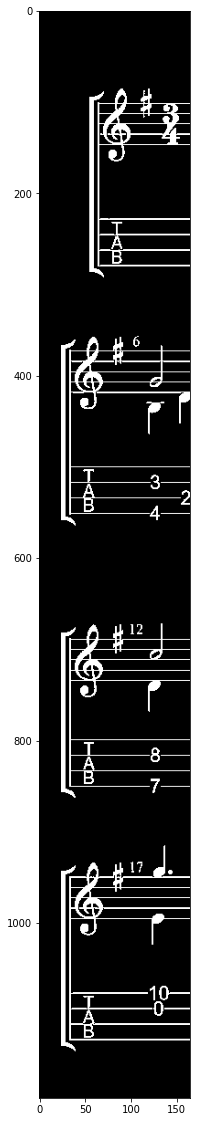

In [6]:
fs.plot_single_image(sheets, off_axis=False)

>>> File : ./data/symbols/treble_clef.png
01 : ./data/symbols/treble_clef.png : (982, 354)
>Inverse binary thresholding with Otsu's method


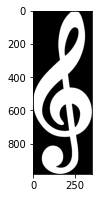

In [7]:
#Load Symbol(sample 1)
symbol = fs.get_images('./data/symbols/treble_clef.png')
fs.plot_single_image(symbol, figsize=(3,3), off_axis=False)

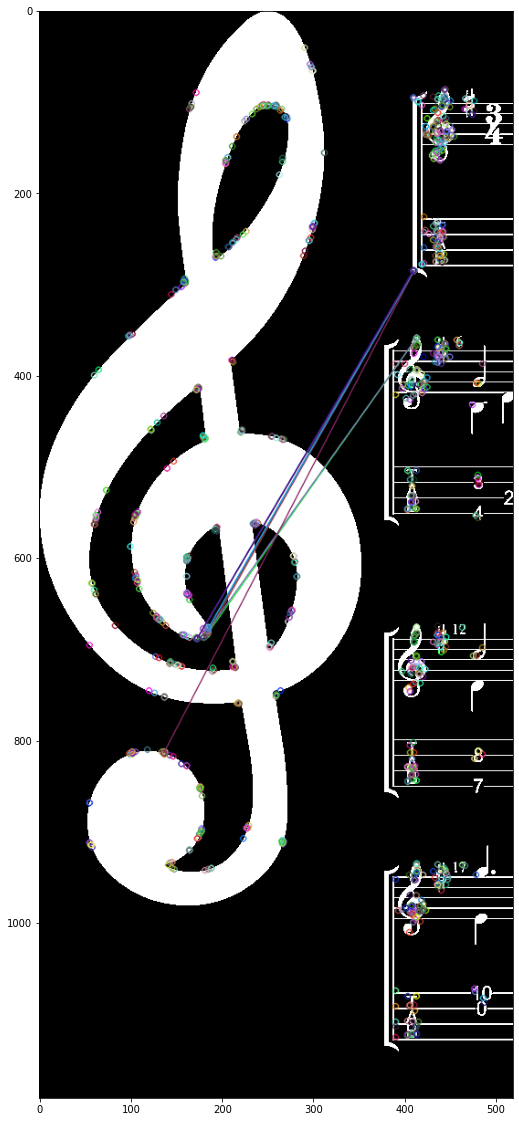

In [9]:
#Brute-force matching : ORB descriptor
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(symbol, None)
kp2, des2 = orb.detectAndCompute(sheets, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)

img_compare = cv2.drawMatches(symbol, kp1, sheets, kp2, matches[:10], None)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot()
ax.imshow(img_compare)
plt.show()

>>> File : ./data/symbols/treble_clef.png
01 : ./data/symbols/treble_clef.png : (982, 354)
>>> Resize factor : x0.4 : (982, 354)->(393, 142)
>Inverse binary thresholding with Otsu's method


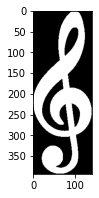

In [29]:
symbol = fs.get_images('./data/symbols/treble_clef.png', resize_factor=0.40)
fs.plot_single_image(symbol, figsize=(3,3), off_axis=False)


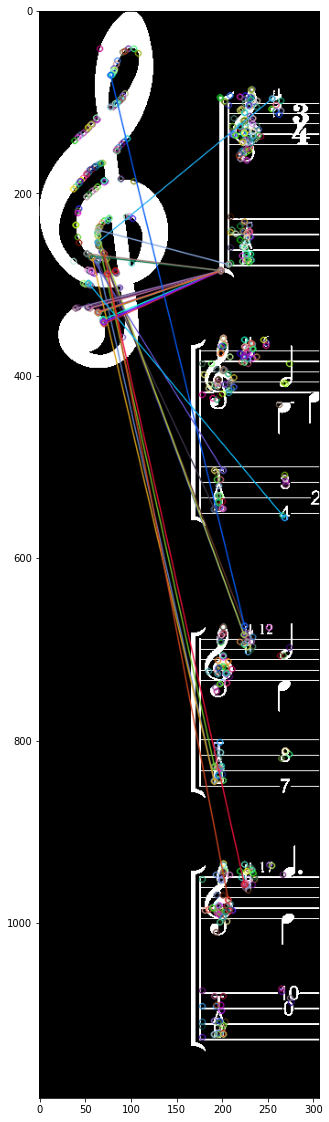

In [30]:
#Brute-force matching : ORB descriptor
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(symbol, None)
kp2, des2 = orb.detectAndCompute(sheets, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)

img_compare = cv2.drawMatches(symbol, kp1, sheets, kp2, matches[:30], None)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot()
ax.imshow(img_compare)
plt.show()

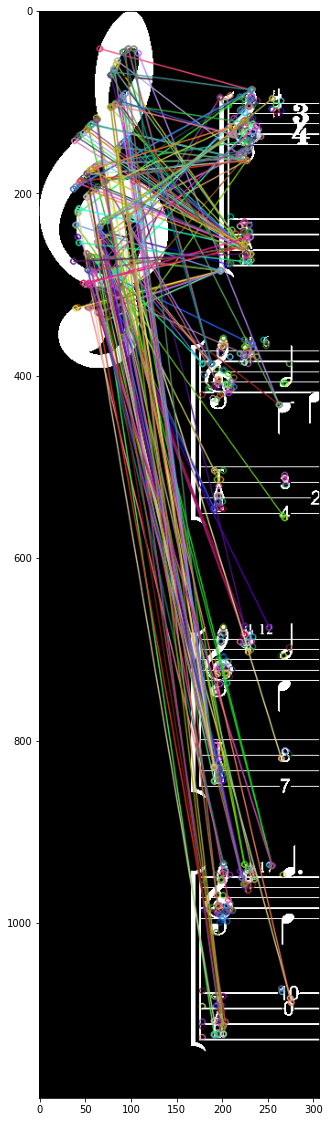

In [33]:
#ORB descriptor & FLANN
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(symbol, None)
kp2, des2 = orb.detectAndCompute(sheets, None)

FLANN_INDEX_LSH = 6
index_params = dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12, multi_probe_level=1)
search_params = dict(checks=100)

matcher = cv2.FlannBasedMatcher(index_params, search_params)
matches = matcher.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)

img_compare = cv2.drawMatches(symbol, kp1, sheets, kp2, matches, None)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot()
ax.imshow(img_compare)
plt.show()